Welkom to the notebook of **bnlearn**!



**bnlearn** is Python package for *learning the graphical structure of Bayesian networks*, *parameter learning*, *inference* and *sampling methods*. Although there are very good Python packages for probabilistic graphical models, it still remains difficult (and somethimes unnecessarily) to (re)build certain pipelines. **bnlearn** for python (this package) is build on the [pgmpy](https://github.com/pgmpy/pgmpy/) package* and contains the most-wanted pipelines.


**Learning a Bayesian network can be split into:**
  * Structure learning: Given a set of data samples, estimate a DAG that captures the dependencies between the variables.
  * Parameter learning: Given a set of data samples and a DAG that captures the dependencies between the variables, estimate the (conditional) probability distributions of the individual variables.
  * Inferences: Compute probabilities given the CPD and DAG.

**More information:**
* [API documentations](https://erdogant.github.io/bnlearn/)
* [Github](https://github.com/erdogant/bnlearn)

**Installation of libraries**

In [1]:
!pip install -U bnlearn

     |████████████████████████████████| 47 kB 2.2 MB/s 
     |████████████████████████████████| 11.2 MB 8.6 MB/s 
     |████████████████████████████████| 1.9 MB 23.0 MB/s 
     |████████████████████████████████| 216 kB 67.6 MB/s 
     |████████████████████████████████| 134 kB 69.5 MB/s 
     |████████████████████████████████| 899 kB 46.6 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=e29fa9c09276ee52de1d9aadb5686ab8f6946e0139809eaa05054c31609d733e
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug

In [1]:
# Version matplotlib should be >= 3.3.4
import matplotlib
print(matplotlib.__version__)

import pandas as pd
import numpy as np

# Version pgmpy should be >= 0.1.13
import pgmpy
print(pgmpy.__version__)

# Latest version bnlearn
import bnlearn as bn
print(bn.__version__)

3.5.1
0.1.17


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.6.2


**Structure learning example**

In [2]:
# Example dataframe sprinkler_data.csv can be loaded with: 
df = bn.import_example()
# df = pd.read_csv('sprinkler_data.csv')
model = bn.structure_learning.fit(df)


[bnlearn] >Downloading example [sprinkler] dataset..
[bnlearn] >Import dataset..
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


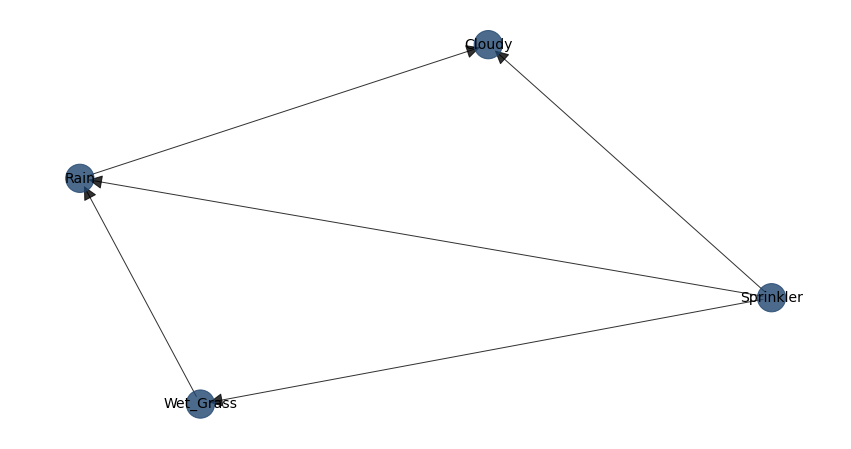

In [3]:
G = bn.plot(model)


In [9]:
# Set some colors to the edges and nodes
node_properties = bn.get_node_properties(model)
node_properties['Sprinkler']['node_color']='#FF0000'

edge_properties = bn.get_edge_properties(model)

edge_properties[('Rain', 'Cloudy')]['color']='#FF0000'
edge_properties[('Rain', 'Cloudy')]['weight']='5'

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.


In [10]:
G = bn.plot(model, interactive=True, params_interactive={'notebook':True}, node_properties=node_properties, edge_properties=edge_properties)

[bnlearn] >Plot based on Bayesian model


**Various methodtypes and scoringtypes**

In [11]:
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')
model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex', scoretype='k2')
model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex', scoretype='bdeu')
model_ex_bdeu = bn.structure_learning.fit(df, methodtype='cl', root_node='Cloudy')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/6.0 [00:00<?, ?it/s]

Parameter Learning

In [12]:
# Import dataframe
df = bn.import_example()
# As an example we set the CPD at False which returns an "empty" DAG
model = bn.import_DAG('sprinkler', CPD=False)
# Now we learn the parameters of the DAG using the df
model_update = bn.parameter_learning.fit(model, df)
# Make plot
#G = bn.plot(model_update)
G = bn.plot(model_update, interactive=True, params_interactive={'notebook':True})

[bnlearn] >Import dataset..
[bnlearn] >Import <sprinkler>
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Cloudy:
+-----------+-------+
| Cloudy(0) | 0.494 |
+-----------+-------+
| Cloudy(1) | 0.506 |
+-----------+-------+
[bnlearn] >CPD of Sprinkler:
+--------------+--------------------+--------------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)          |
+--------------+--------------------+--------------------+
| Sprinkler(0) | 0.4807692307692308 | 0.7075098814229249 |
+--------------+--------------------+--------------------+
| Sprinkler(1) | 0.5192307692307693 | 0.2924901185770751 |
+--------------+--------------------+--------------------+
[bnlearn] >CPD of Rain:
+---------+--------------------+---------------------+
| Cloudy  | Cloudy(0)          | Cloudy(1)           |
+---------+--------------------+---------------------+
| Rain(0) | 0.6518218623481782 | 0.33695652173913043 |
+---------+--------------------+---------------------+

**Inferences**

In [13]:
model = bn.import_DAG('sprinkler')
q_1 = bn.inference.fit(model, variables=['Rain'], evidence={'Cloudy':1,'Sprinkler':0, 'Wet_Grass':1})
q_2 = bn.inference.fit(model, variables=['Rain'], evidence={'Cloudy':1})

[bnlearn] >Import <sprinkler>
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----+--------+-----+
|    |   Rain |   p |
+====+========+=====+
|  0 |      0 |   0 |
+----+--------+-----+
|  1 |      1 |   1 |
+----+--------+-----+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----+--------+-----+
|    |   Rain |   p |
+====+========+=====+
|  0 |      0 | 0.2 |
+----+--------+-----+
|  1 |      1 | 0.8 |
+----+--------+-----+


In [14]:
print(dir(q_2))
print(q_2.df)

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__truediv__', '__weakref__', '_str', 'add_state_names', 'assignment', 'cardinality', 'copy', 'del_state_names', 'df', 'divide', 'get_cardinality', 'get_state_names', 'get_state_no', 'get_value', 'identity_factor', 'is_valid_cpd', 'marginalize', 'maximize', 'name_to_no', 'no_to_name', 'normalize', 'product', 'reduce', 'sample', 'scope', 'set_value', 'state_names', 'store_state_names', 'sum', 'values', 'variables']
   Rain    p
0     0  0.2
1     1  0.8


**Sampling**

In [15]:
model = bn.import_DAG('sprinkler')
df = bn.sampling(model, n=1000)

[bnlearn] >Import <sprinkler>
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn] >Forward sampling for 1000 samples..


  0%|          | 0/4 [00:00<?, ?it/s]

**Comparing networks**

[bnlearn] >Import <asia>
[bnlearn] >Downloading example [asia] dataset..
[bnlearn] >Extracting files..
[bnlearn] >Loading bif file </usr/local/lib/python3.7/dist-packages/bnlearn/data/asia.bif>
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


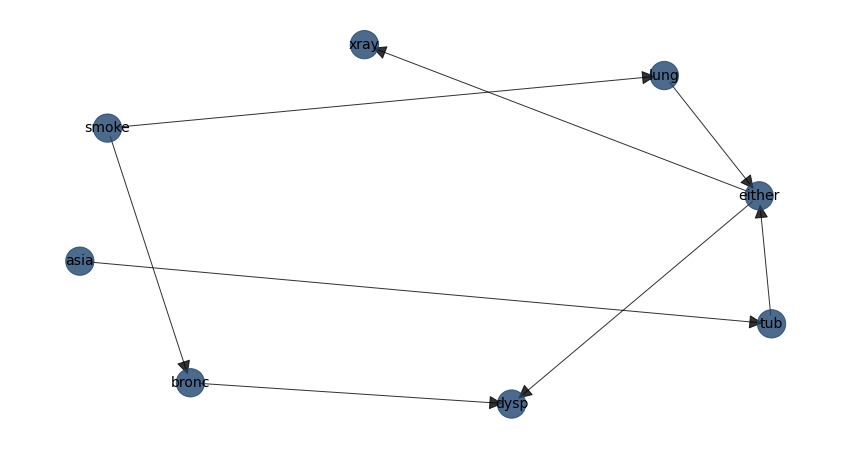

[bnlearn] >Forward sampling for 10000 samples..


  0%|          | 0/8 [00:00<?, ?it/s]

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


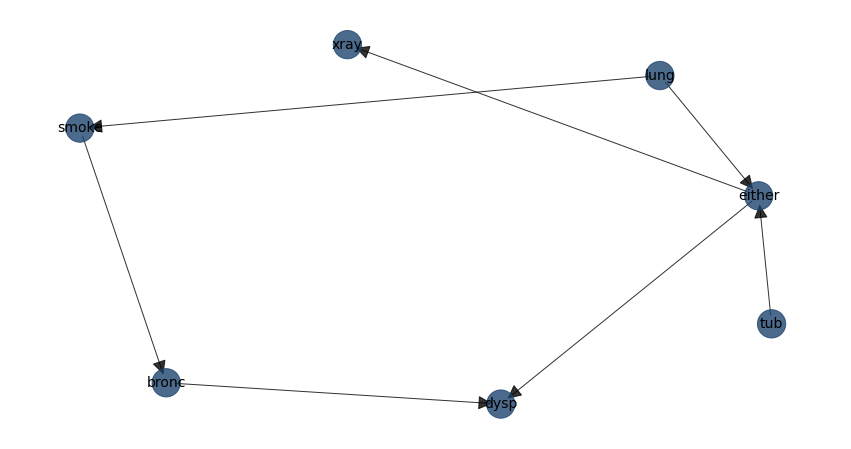

[bnlearn] >Existing coordinates from <pos> are used.


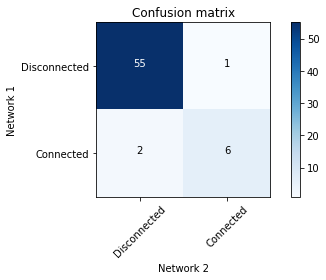

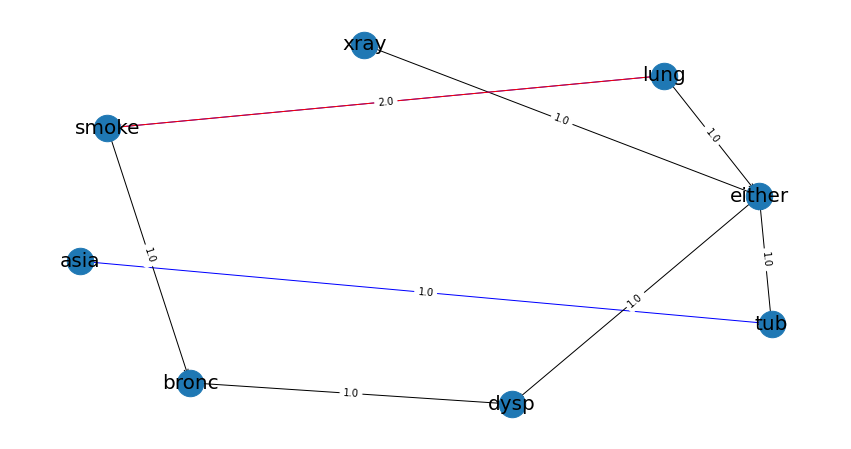

(array([[55,  1],
        [ 2,  6]]), target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0   -1      0     0      0       0     0     0
 tub        0    0      0     0      0       1     0     0
 smoke      0    0      0    -1      1       0     0     0
 lung       0    0      2     0      0       1     0     0
 bronc      0    0      0     0      0       0     0     1
 either     0    0      0     0      0       0     1     1
 xray       0    0      0     0      0       0     0     0
 dysp       0    0      0     0      0       0     0     0)

In [16]:
# Load asia DAG
model = bn.import_DAG('asia')
# plot ground truth
G = bn.plot(model, interactive=False)
# Sampling
df = bn.sampling(model, n=10000)
# Structure learning of sampled dataset
model_sl = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
# Plot based on structure learning of sampled data
bn.plot(model_sl, pos=G['pos'])

# Compare networks and make plot
bn.compare_networks(model, model_sl, pos=G['pos'])

**Loading example DAG files**

Note that some of the CPDs do not add up to exactly 1. This will raise an error that needs to be fixed in the input file. As an example, the **asia** works correctly but when you try **pathfinder** throws the error: "*>Warning: CPD [Fault] does not add up to 1 but is: 1.00000003*". You need to make sure that it exactly sums up to 1.

In [17]:
bif_file= 'sprinkler'
bif_file= 'alarm'
bif_file= 'andes'
bif_file= 'asia'
#bif_file= 'pathfinder'
#bif_file= 'sachs'
#bif_file= 'miserables'
#bif_file= 'filepath/to/model.bif'

# Loading example dataset
model = bn.import_DAG(bif_file, verbose=1)



---



---



### Example to learn structure in dataset that start with source-target and the weights.

The weights can be counts how often two edges were detected.

In [18]:
raw = bn.import_example('stormofswords')
# Convert raw data into sparse datamatrix
df = bn.vec2df(raw['source'], raw['target'], raw['weight'])


[bnlearn] >Downloading example [stormofswords] dataset..
[bnlearn] >Import dataset..


In [19]:
print(df.head())

   Aegon  Aemon  Aerys  Alliser  Amory  Anguy   Arya  Balon  Barristan  \
0  False   True  False    False  False  False  False  False      False   
1  False   True  False    False  False  False  False  False      False   
2  False   True  False    False  False  False  False  False      False   
3  False   True  False    False  False  False  False  False      False   
4  False   True  False    False  False  False  False  False      False   

   Belwas  ...  Tommen  Tyrion  Tywin    Val  Varys  Viserys  Walder  Walton  \
0   False  ...   False   False  False  False  False    False   False   False   
1   False  ...   False   False  False  False  False    False   False   False   
2   False  ...   False   False  False  False  False    False   False   False   
3   False  ...   False   False  False  False  False    False   False   False   
4   False  ...   False   False  False  False  False    False   False   False   

    Worm  Ygritte  
0  False    False  
1  False    False  
2  False    Fa

In [20]:
# Make the actual Bayesian DAG
DAG = bn.make_DAG(list(zip(raw['source'], raw['target'])), verbose=0)
# Make plot
G=bn.plot(DAG, interactive=True)
# You will see that this is a huge network with hundreds of edges.

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


In [21]:
# Parameter learning
model = bn.parameter_learning.fit(DAG, df, verbose=3)
# All the CPDs are now learned 

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Aemon:
+--------------+-----+---------------+
| Jon          | ... | Jon(True)     |
+--------------+-----+---------------+
| Robert       | ... | Robert(True)  |
+--------------+-----+---------------+
| Stannis      | ... | Stannis(True) |
+--------------+-----+---------------+
| Aemon(False) | ... | 0.5           |
+--------------+-----+---------------+
| Aemon(True)  | ... | 0.5           |
+--------------+-----+---------------+
[bnlearn] >CPD of Grenn:
+--------------+-----+----------------+---------------+
| Aemon        | ... | Aemon(True)    | Aemon(True)   |
+--------------+-----+----------------+---------------+
| Eddison      | ... | Eddison(True)  | Eddison(True) |
+--------------+-----+----------------+---------------+
| Jon          | ... | Jon(True)      | Jon(True)     |
+--------------+-----+----------------+---------------+
| Samwell      | ... | Samwell(False) | Samwell(True) |
+------

In [22]:
# Generate some data based on DAG
# df1 = bn.sampling(model, n=1000)
# Make predictions
# print(query)
query = bn.inference.fit(DAG, variables=['Grenn'], evidence={'Aemon': 1, 'Samwell': 1})
print(query)
query.df

[bnlearn] >Variable Elimination..


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

+----+---------+----------+
|    |   Grenn |        p |
+====+=========+==========+
|  0 |       0 | 0.578207 |
+----+---------+----------+
|  1 |       1 | 0.421793 |
+----+---------+----------+
+--------------+--------------+
| Grenn        |   phi(Grenn) |
+==============+==============+
| Grenn(False) |       0.5782 |
+--------------+--------------+
| Grenn(True)  |       0.4218 |
+--------------+--------------+


,Grenn,p
0,0,0.578207
1,1,0.421793


In [23]:
# Structure learning on such a huge network will take a lot of time, and with some methods it may even be impossible to compute. 
# Lets try to learn it structure for a smaller subset of the columns.
DAG_learned = bn.structure_learning.fit(df.iloc[:, 0:20])

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


In [24]:
# Keep only significant edges
DAG_learned = bn.independence_test(DAG_learned, df, prune=True)

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Edge [Bran <-> Brynden] [P=0.0519475] is excluded because it was not significant (P<0.05) with [chi_square]


In [25]:
# Plot the edges for the small network
_ = bn.plot(DAG_learned, interactive=True)

[bnlearn]> Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


**Fin notebook**